<a href="https://colab.research.google.com/github/hongjai-rhee/public/blob/master/%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

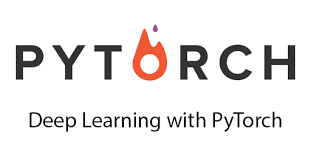

# 라이블러리 불러오기

# 데이터 불러오기

In [1]:
from keras.datasets import fashion_mnist, mnist
import torch; from torch import nn; from torch import optim


Using TensorFlow backend.


In [2]:
(X_train0, y_train), (X_test0, y_test) = mnist.load_data()

print(X_train0.shape, X_train0.dtype)
print(y_train.shape, y_train.dtype)
print(X_test0.shape, X_test0.dtype)
print(y_test.shape, y_test.dtype)

11493376/11490434 [==============================] - 1s 0us/step
(60000, 28, 28) uint8
(60000,) uint8
(10000, 28, 28) uint8
(10000,) uint8


# 토치 텐서형 데이터로 변환

In [0]:
X_train = X_train0.reshape(60000, 784).astype('float64') / 255.0
X_test = X_test0.reshape(10000, 784).astype('float64') / 255.0

X_train, y_train, X_test, y_test = map(
    torch.tensor, (X_train, y_train, X_test, y_test))

X_train, y_train, X_test, y_test = X_train.float(
), y_train.long(), X_test.float(), y_test.long()

# 모형설정

In [0]:
from torch import nn

model = nn.Sequential(
    nn.Linear(784, 15),
    nn.Sigmoid(),
    nn.Linear(15, 10),
    nn.Sigmoid(),
).cuda()

from torch import optim

opt = optim.SGD(model.parameters(), lr=0.5)
loss_fn = torch.nn.CrossEntropyLoss()

# 학습 실행

In [7]:
def accuracy(pred, y):
    preds = torch.argmax(pred, dim=1)
    return (preds == y).float().mean()


epochs = 10
n = X_train.shape[0]
bs = 100

for epoch in range(epochs):
    for i in range((n - 1) // bs + 1):
        start_i = i * bs
        end_i = start_i + bs
        xb = X_train[start_i:end_i].cuda()
        yb = y_train[start_i:end_i].cuda()
        pred = model(xb)
        loss = loss_fn(pred, yb)
        loss.backward()
        opt.step()
        opt.zero_grad()
    acc = accuracy(pred, yb)
    print("{:2} epoch - cross entropy : {:4.2}, accuracy : {:4.2}".format(
        epoch + 1, loss.detach().item(), acc.detach().item()))

 1 epoch - cross entropy :  1.8, accuracy : 0.85
 2 epoch - cross entropy :  1.7, accuracy : 0.88
 3 epoch - cross entropy :  1.6, accuracy : 0.89
 4 epoch - cross entropy :  1.6, accuracy : 0.91
 5 epoch - cross entropy :  1.6, accuracy : 0.92
 6 epoch - cross entropy :  1.6, accuracy : 0.92
 7 epoch - cross entropy :  1.6, accuracy : 0.93
 8 epoch - cross entropy :  1.6, accuracy : 0.93
 9 epoch - cross entropy :  1.6, accuracy : 0.93
10 epoch - cross entropy :  1.5, accuracy : 0.93
